In [1]:
#Data Cleaning
import pandas as pd
import numpy as np
data = pd.read_csv("diabetic_data.csv")

In [2]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
data.replace('?', pd.NA, inplace=True)

In [5]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride          

In [6]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
#Dropping dead patients data
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [8]:
data['Output_Label'] = (data.readmitted == '<30').astype('int64')

In [9]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [10]:
def calc_prevalence(y_actual):
    return(sum(y_actual/len(y_actual)))

print('Prevalence: %.3f' %calc_prevalence(data['Output_Label'].values))

Prevalence: 0.114


In [11]:
# 11% population is rehospitalized, we saw that using prevalance 

In [12]:
numerical_feature = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

In [13]:
data[numerical_feature].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [14]:
categorical_columns = []
for column in data.columns:
    # Check if the data type is object
    if data[column].dtype == 'object':
        # If it is, append the column name to the list of categorical columns
        categorical_columns.append(column)

# Print the list of categorical column names
print("Categorical columns:")
for column in categorical_columns:
    print(column)

Categorical columns:
race
gender
age
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


In [15]:
categorical_features = ['race', 'gender',  'max_glu_serum', 'AlCresult',
                                        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                                        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                                        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                                        'tolazamide', 'insulin',
                                        'glyburide-metformin', 'glipizide-metformin',
                                        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                                        'metformin-pioglitazone', 'change', 'diabetesMed', 'payer_code']



In [16]:
data['race'] = data['race'].fillna('UNK')  
data['payer_code'] = data['payer_code'].fillna('UNK')  # Fills missing values in 'payer_code' column with 'UNK'
data['medical_specialty'] = data['medical_specialty'].fillna('UNK') # Fills missing values in 'medical_specialty' column with 'UNK'


In [17]:
print('Numbermedical_specialty:',data.medical_specialty.nunique())
data.groupby('medical_specialty').size().sort_values(ascending=False)

Numbermedical_specialty: 73


medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

In [18]:
top_10 = ['UNK','InternalMedicine','Emergency/Trauma','Family/GeneralPractice ','Cardiology ','Surgery-General','Nephrology','Orthopdics','Orthopedics-Reconstructive','Radiologist']
data['med_spec'] = data['medical_specialty'].copy()
data.loc[~data.med_spec.isin(top_10),'med_spec']= 'Other'

In [19]:
data.groupby('med_spec').size()

med_spec
Emergency/Trauma               7419
InternalMedicine              14237
Nephrology                     1539
Orthopedics-Reconstructive     1230
Other                         22122
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

In [20]:
data.shape

(99343, 52)

In [21]:
null_counts = data.isnull().sum()

# Print the number of null values in each column
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      96218
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         20
diag_2                        356
diag_3                       1419
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepirid

In [22]:
categorical_columns = []
for column in data.columns:
    # Check if the data type is object
    if data[column].dtype == 'object':
        # If it is, append the column name to the list of categorical columns
        categorical_columns.append(column)

# Print the list of categorical column names
print("Categorical columns:")
for column in categorical_columns:
    print(column)

Categorical columns:
race
gender
age
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted
med_spec


In [23]:
from sklearn.preprocessing import LabelEncoder

# Assuming categorical_columns contains the names of your categorical columns
# Replace missing values (NaN) with a placeholder value (e.g., 'missing')
data[categorical_columns] = data[categorical_columns].fillna('missing')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
encoded_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
for column in categorical_columns:
    encoded_data[column] = label_encoder.fit_transform(data[column])

# Display the encoded data
print("Encoded Data:")
print(encoded_data)


Encoded Data:
        encounter_id  patient_nbr  race  gender  age  weight  \
0            2278392      8222157     2       0    0       9   
1             149190     55629189     2       0    1       9   
2              64410     86047875     0       0    2       9   
3             500364     82442376     2       1    3       9   
4              16680     42519267     2       1    4       9   
...              ...          ...   ...     ...  ...     ...   
101761     443847548    100162476     0       1    7       9   
101762     443847782     74694222     0       0    8       9   
101763     443854148     41088789     2       1    7       9   
101764     443857166     31693671     2       0    8       9   
101765     443867222    175429310     2       1    7       9   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1              

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [25]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [26]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'med_spec'],
      dtype='object')


In [27]:
data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [28]:
data.drop(columns=near_zero_variance_cols, inplace=True)

NameError: name 'near_zero_variance_cols' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
X = data.drop(columns=['readmitted'])
y = data['readmitted']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming 'X' is your feature matrix containing categorical variables
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical variables
X_encoded = X.copy()  # Make a copy of X to avoid modifying the original dataframe

# Iterate through each column in X and check if it's categorical
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column contains categorical variables
        X_encoded[col] = label_encoder.fit_transform(X[col])  # Encode categorical variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)

print("Performance metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Performance metrics:
Accuracy: 0.6843827067290754
Precision (micro): 0.6843827067290754
Precision (macro): 0.7568012086083811
Precision (weighted): 0.6793673867259028
Recall (micro): 0.6843827067290754
Recall (macro): 0.7286207815277214
Recall (weighted): 0.6843827067290754
F1 Score (micro): 0.6843827067290754
F1 Score (macro): 0.7215686866133367
F1 Score (weighted): 0.6564745583547106
Confusion Matrix:
[[2277    0    0]
 [   0 2294 4870]
 [   0 1401 9027]]


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


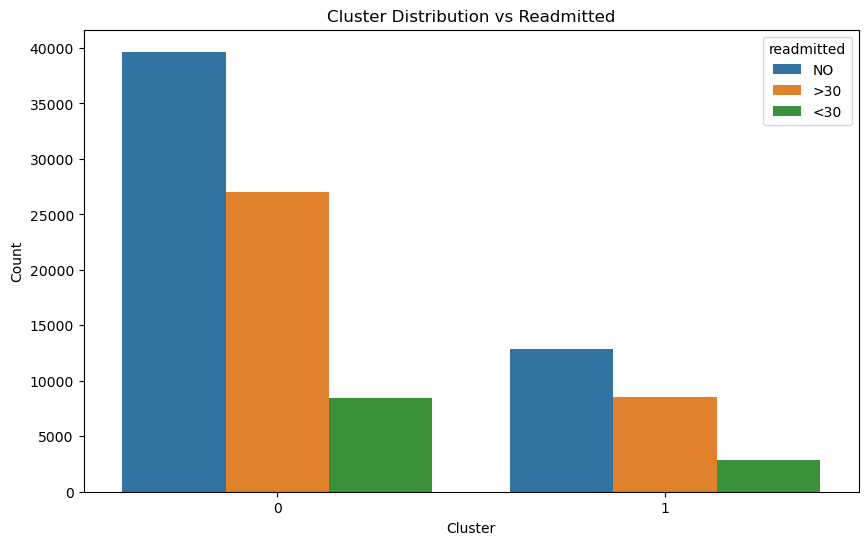

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' is your feature matrix containing categorical variables
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical variables
X_encoded = X.copy()  # Make a copy of X to avoid modifying the original dataframe

# Iterate through each column in X and check if it's categorical
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column contains categorical variables
        X_encoded[col] = label_encoder.fit_transform(X[col])  # Encode categorical variables

# Now X_encoded should contain only numeric values, you can proceed with KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(X_encoded)

# Compare cluster distribution with target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='readmitted', data=data)
plt.title('Cluster Distribution vs Readmitted')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Train logistic regression models for each cluster with scaled data
scaler = StandardScaler()

X_train_scaled_cluster0 = scaler.fit_transform(X_train_cluster0)
X_test_scaled_cluster0 = scaler.transform(X_test_cluster0)

lr_model_cluster0 = LogisticRegression(max_iter=1000)
lr_model_cluster0.fit(X_train_scaled_cluster0, y_train_cluster0)

X_train_scaled_cluster1 = scaler.fit_transform(X_train_cluster1)
X_test_scaled_cluster1 = scaler.transform(X_test_cluster1)

lr_model_cluster1 = LogisticRegression(max_iter=1000)
lr_model_cluster1.fit(X_train_scaled_cluster1, y_train_cluster1)

# Evaluate models for each cluster
y_pred_cluster0 = lr_model_cluster0.predict(X_test_scaled_cluster0)
y_pred_cluster1 = lr_model_cluster1.predict(X_test_scaled_cluster1)

print("Cluster 0 Performance metrics:")
print("Accuracy:", accuracy_score(y_test_cluster0, y_pred_cluster0))
print("Precision:", precision_score(y_test_cluster0, y_pred_cluster0, average='weighted'))
print("Recall:", recall_score(y_test_cluster0, y_pred_cluster0, average='weighted'))
print("F1 Score:", f1_score(y_test_cluster0, y_pred_cluster0, average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cluster0, y_pred_cluster0))

print("Cluster 1 Performance metrics:")
print("Accuracy:", accuracy_score(y_test_cluster1, y_pred_cluster1))
print("Precision:", precision_score(y_test_cluster1, y_pred_cluster1, average='weighted'))
print("Recall:", recall_score(y_test_cluster1, y_pred_cluster1, average='weighted'))
print("F1 Score:", f1_score(y_test_cluster1, y_pred_cluster1, average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cluster1, y_pred_cluster1))


Cluster 0 Performance metrics:
Accuracy: 0.6825386254661694
Precision: 0.6788681106986425
Recall: 0.6825386254661694
F1 Score: 0.6549634484397949
Confusion Matrix:
[[1675    0    0]
 [   0 1778 3706]
 [   0 1061 6796]]
Cluster 1 Performance metrics:
Accuracy: 0.6935915928291778
Precision: 0.6851961795848364
Recall: 0.6935915928291778
F1 Score: 0.666566320022969
Confusion Matrix:
[[ 591    0    0]
 [   0  541 1142]
 [   0  345 2234]]
